# Análise Financeira

In [3]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

carteira_df = pd.read_excel(r'E:\Downloads\CarteiraMentoria.xlsx')

display(carteira_df)

,Ativos,Valor Investido,Tipo,Qtde
0,DJI,5000,Ação,134.000000
1,NDX,5000,Ação,134.000000
2,DAX,5000,Ação,426.000000
3,SPX,5000,Ação,162.000000
4,DJC,5000,Ação,128.000000
5,DJT,5000,Ação,416.000000
6,DJU,10000,ETF,71.000000
7,NDQ,5000,FII,40.000000
8,RTS,5000,FII,39.000000
9,Tesouro Selic,50000,Renda Fixa,4.775239


### Distribuição por Ativos

<AxesSubplot: title={'center': 'Distribuição de Ativos'}>

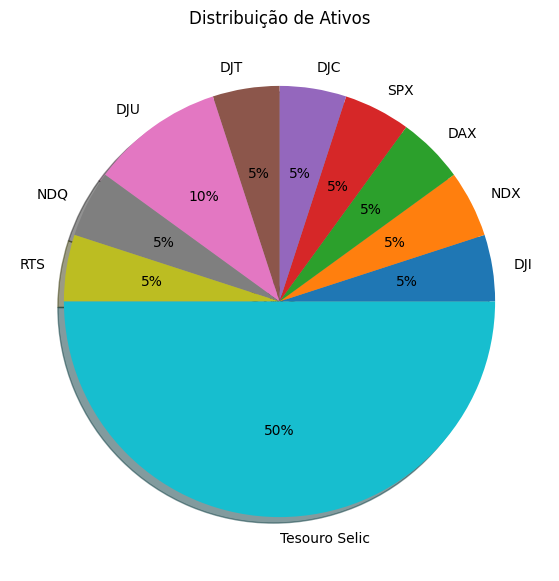

In [4]:
carteira_df.plot.pie(figsize=(15,7) ,autopct='%.0f%%', shadow=True, labels=carteira_df['Ativos'], y='Valor Investido', legend=False, title='Distribuição de Ativos', ylabel='')

### Distribuição dos ativos por classe

C:\Users\Léo\AppData\Local\Temp\ipykernel_15000\3791183040.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  classes_df = carteira_df[['Tipo', '%']].groupby(carteira_df['Tipo']).sum()


array([<AxesSubplot: >], dtype=object)

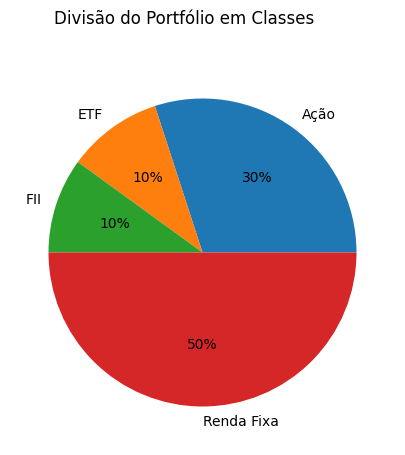

In [5]:
# valor total investido
total_investido = carteira_df['Valor Investido'].sum()

# criando uma coluna de % sobre o investimento
carteira_df['%'] = (carteira_df['Valor Investido'] / total_investido) * 100

# criando um df para classificar as classes
classes_df = carteira_df[['Tipo', '%']].groupby(carteira_df['Tipo']).sum()

# configurando o gráfico
classes_df.plot( figsize=(15, 5), kind='pie', subplots=True, autopct='%.0f%%', legend=False, ylabel='', title='Divisão do Portfólio em Classes')

### IBOV

In [6]:
import pandas_datareader as web

# pegando as cotações do ibov
ibov_df = web.DataReader('^BVP', data_source='stooq', start='2022-01-01', end='2022-12-10')
ibov_df = ibov_df.sort_values('Date')

display(ibov_df)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,104823.40,106125.50,103413.40,103921.60,1127626100
2022-01-04,103921.60,104276.30,103096.30,103513.60,1149160700
2022-01-05,103513.60,103513.60,100849.60,101005.60,1288369200
2022-01-06,101005.80,102234.70,100999.90,101561.10,1174921000
2022-01-07,101561.10,102719.50,101104.00,102719.50,1173341400
...,...,...,...,...,...
2022-12-05,111921.65,112149.58,109270.18,109401.41,1236023600
2022-12-06,109402.99,110662.73,109217.24,110188.57,1343860400
2022-12-07,110188.05,110246.79,108612.02,109068.55,1382531900


<AxesSubplot: xlabel='Date'>

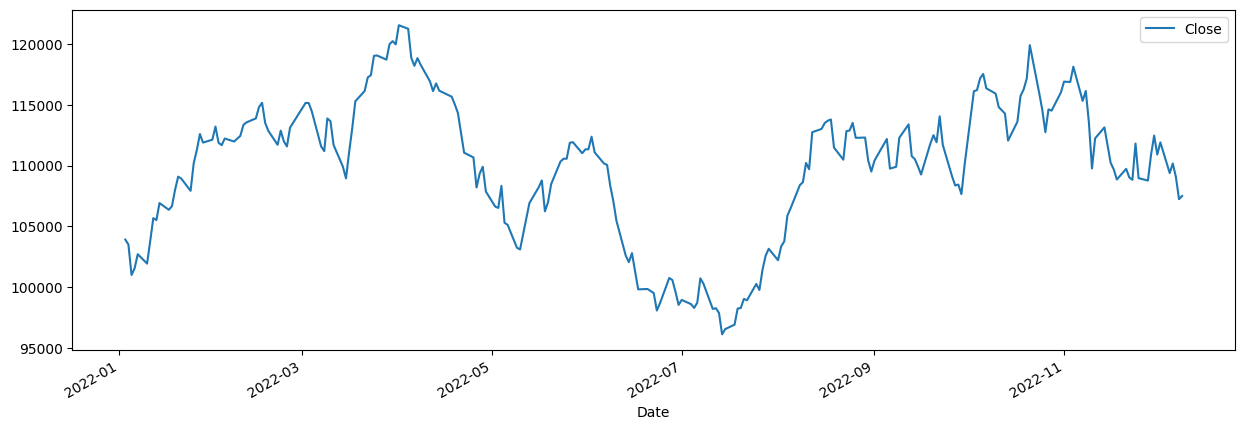

In [7]:
# gráfico ibvo
ibov_df['Close'].plot(figsize=(15,5), legend=True)


In [8]:
# criando um df para nossos ativos
cotac_carteira = pd.DataFrame()

# a nossa carteira
for ativo in carteira_df['Ativos']:
    if ativo != 'Tesouro Selic':
        cotac_carteira[f'{ativo}'] = web.DataReader(f'^{ativo}', data_source='stooq', start='2022-01-01', end='2022-12-10')['Close']

display(cotac_carteira)


,DJI,NDX,DAX,SPX,DJC,DJT,DJU,NDQ,RTS
Date,,,,,,,,,
2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12
2022-12-08,33781.48,11637.50,14264.56,3963.51,11192.96,13809.74,977.54,11082.00,1096.63
2022-12-07,33597.92,11497.39,14261.19,3933.92,11140.09,13767.89,972.78,10958.55,1098.93
2022-12-06,33596.34,11549.69,14343.19,3941.26,11177.61,13898.10,978.96,11014.89,1097.09
2022-12-05,33947.10,11786.80,14447.61,3998.84,11263.95,14048.18,970.23,11239.94,1114.69
...,...,...,...,...,...,...,...,...,...
2022-01-07,36231.66,15592.19,15947.74,4677.03,12180.31,16268.77,968.10,14935.90,NaN
2022-01-06,36236.47,15765.36,16052.03,4696.05,12187.97,16345.25,962.46,15080.87,1545.24
2022-01-05,36407.11,15771.78,16271.75,4700.58,12232.56,16344.15,969.20,15100.17,1586.20


In [9]:
# preenchendo células vazias com o valor da célula anterior
cotac_carteira = cotac_carteira.ffill()
cotac_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2022-12-09 to 2022-01-03
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJI     237 non-null    float64
 1   NDX     237 non-null    float64
 2   DAX     237 non-null    float64
 3   SPX     237 non-null    float64
 4   DJC     237 non-null    float64
 5   DJT     237 non-null    float64
 6   DJU     237 non-null    float64
 7   NDQ     237 non-null    float64
 8   RTS     237 non-null    float64
dtypes: float64(9)
memory usage: 18.5 KB


### Tesouro Selic

In [10]:
# dando entrada as informações do tesouro direto
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
# definindo o separador e o decimal
tesouro_df = pd.read_csv(link, sep=';', decimal=',')

# passando a coluna data base para formato de data
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'], format='%d/%m/%Y')

display(tesouro_df)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Prefixado com Juros Semestrais,01/01/2029,2021-05-03,8.94,9.06,1089.55,1083.03,1082.66
1,Tesouro IPCA+ com Juros Semestrais,15/08/2024,2021-05-03,2.73,2.85,3918.20,3904.46,3903.65
2,Tesouro Prefixado com Juros Semestrais,01/01/2023,2021-05-11,6.69,6.81,1083.47,1081.63,1081.35
3,Tesouro Prefixado,01/01/2025,2021-05-11,8.43,8.55,744.89,741.90,741.66
4,Tesouro Prefixado com Juros Semestrais,01/01/2029,2021-05-11,9.12,9.24,1082.04,1075.62,1075.24
...,...,...,...,...,...,...,...,...
128734,Tesouro Prefixado,01/01/2025,2020-10-02,6.70,6.82,760.08,756.47,756.27
128735,Tesouro Prefixado com Juros Semestrais,01/01/2029,2020-11-13,7.52,7.64,1181.31,1173.75,1173.41
128736,Tesouro IPCA+,15/08/2026,2020-11-13,2.95,3.07,2850.98,2831.99,2829.64
128737,Tesouro IPCA+,15/08/2024,2020-11-13,2.07,2.19,3120.46,3106.80,3104.33


In [11]:
# verificando se tem alguma linha vazia e o tipo de cada coluna
tesouro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128739 entries, 0 to 128738
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Tipo Titulo        128739 non-null  object        
 1   Data Vencimento    128739 non-null  object        
 2   Data Base          128739 non-null  datetime64[ns]
 3   Taxa Compra Manha  128739 non-null  float64       
 4   Taxa Venda Manha   128739 non-null  float64       
 5   PU Compra Manha    128739 non-null  float64       
 6   PU Venda Manha     128739 non-null  float64       
 7   PU Base Manha      128739 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 7.9+ MB


In [12]:
# filtrando a coluna tipo título para pegar só tesouro selic
tesouro_df = tesouro_df.loc[tesouro_df['Tipo Titulo'] == 'Tesouro Selic']

display(tesouro_df)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
12,Tesouro Selic,01/03/2023,2021-05-11,0.13,0.14,10818.39,10816.44,10814.91
13,Tesouro Selic,01/09/2024,2021-05-11,0.27,0.28,10750.11,10746.58,10744.99
21,Tesouro Selic,01/03/2025,2021-05-11,0.32,0.33,10712.77,10708.71,10707.10
28,Tesouro Selic,01/03/2027,2021-05-11,0.34,0.35,10632.60,10626.47,10624.87
39,Tesouro Selic,01/03/2023,2021-06-21,0.13,0.14,10861.92,10860.09,10858.23
...,...,...,...,...,...,...,...,...
128695,Tesouro Selic,01/03/2025,2020-10-08,0.37,0.38,10541.01,10536.41,10535.42
128698,Tesouro Selic,01/03/2021,2020-10-08,0.15,0.16,10709.12,10708.71,10707.80
128711,Tesouro Selic,01/03/2023,2020-10-08,0.31,0.32,10636.36,10633.84,10632.87
128730,Tesouro Selic,01/03/2023,2020-11-13,0.16,0.17,10695.27,10692.83,10691.92


In [13]:
# renomeando
tesouro_df = tesouro_df.rename(columns={'Data Base' : 'Date'})

# juntando as dfs
cotac_carteira = cotac_carteira.merge(tesouro_df[['Date', 'PU Base Manha']], on='Date', how='left')

display(cotac_carteira)

,Date,DJI,NDX,DAX,SPX,DJC,DJT,DJU,NDQ,RTS,PU Base Manha
0,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12526.18
1,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12521.17
2,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12514.50
3,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12439.70
4,2022-12-08,33781.48,11637.50,14264.56,3963.51,11192.96,13809.74,977.54,11082.00,1096.63,12519.79
...,...,...,...,...,...,...,...,...,...,...,...
919,2022-01-04,36799.65,16279.73,16152.61,4793.54,12360.33,16579.59,969.73,15622.72,1622.58,11092.50
920,2022-01-03,36585.06,16501.77,16020.73,4796.56,12263.85,16302.79,972.24,15832.80,1622.75,11228.88
921,2022-01-03,36585.06,16501.77,16020.73,4796.56,12263.85,16302.79,972.24,15832.80,1622.75,11201.71
922,2022-01-03,36585.06,16501.77,16020.73,4796.56,12263.85,16302.79,972.24,15832.80,1622.75,11183.97


In [23]:
# renomenado a coluna e preenchendo as células vazias
cotac_carteira = cotac_carteira.rename(columns={'PU Base Manha' : 'Tesouro Selic'}).ffill()

display(cotac_carteira)

,Date,DJI,NDX,DAX,SPX,DJC,DJT,DJU,NDQ,RTS,Tesouro Selic
0,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12526.18
1,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12521.17
2,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12514.50
3,2022-12-09,33476.46,11563.33,14370.72,3934.38,11117.66,13762.82,974.31,11004.62,1099.12,12439.70
4,2022-12-08,33781.48,11637.50,14264.56,3963.51,11192.96,13809.74,977.54,11082.00,1096.63,12519.79
...,...,...,...,...,...,...,...,...,...,...,...
919,2022-01-04,36799.65,16279.73,16152.61,4793.54,12360.33,16579.59,969.73,15622.72,1622.58,11092.50
920,2022-01-03,36585.06,16501.77,16020.73,4796.56,12263.85,16302.79,972.24,15832.80,1622.75,11228.88
921,2022-01-03,36585.06,16501.77,16020.73,4796.56,12263.85,16302.79,972.24,15832.80,1622.75,11201.71
922,2022-01-03,36585.06,16501.77,16020.73,4796.56,12263.85,16302.79,972.24,15832.80,1622.75,11183.97


In [18]:
cotac_carteira.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 0 to 923
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           924 non-null    datetime64[ns]
 1   DJI            924 non-null    float64       
 2   NDX            924 non-null    float64       
 3   DAX            924 non-null    float64       
 4   SPX            924 non-null    float64       
 5   DJC            924 non-null    float64       
 6   DJT            924 non-null    float64       
 7   DJU            924 non-null    float64       
 8   NDQ            924 non-null    float64       
 9   RTS            924 non-null    float64       
 10  Tesouro Selic  924 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 86.6 KB


### Total Investido

In [68]:
# criando uma cópia
valor_investido = cotac_carteira.copy()

# multiplicando o valor de uma cota pela quantidades de cotas na carteira
for ativo in carteira_df['Ativos']:
    valor_investido[ativo] = valor_investido[ativo] * carteira_df.loc[carteira_df['Ativos'] == ativo, 'Qtde'].values[0]

# coluna data para index e criando a coluna total
valor_investido = valor_investido.set_index('Date').sort_values('Date')
valor_investido['Total'] = valor_investido.sum(axis=1)

# arrumando as escalas
valor_investido = valor_investido / 4

display(valor_investido)

,DJI,NDX,DAX,SPX,DJC,DJT,DJU,NDQ,RTS,Tesouro Selic,Total
Date,,,,,,,,,,,
2022-01-03,1225599.510,552809.295,1706207.745,194260.680,392443.20,1695490.16,17257.2600,158328.0,15821.8125,13237.607300,5.971455e+06
2022-01-03,1225599.510,552809.295,1706207.745,194260.680,392443.20,1695490.16,17257.2600,158328.0,15821.8125,13405.146562,5.971623e+06
2022-01-03,1225599.510,552809.295,1706207.745,194260.680,392443.20,1695490.16,17257.2600,158328.0,15821.8125,13351.532565,5.971569e+06
2022-01-03,1225599.510,552809.295,1706207.745,194260.680,392443.20,1695490.16,17257.2600,158328.0,15821.8125,13372.710750,5.971590e+06
2022-01-04,1232788.275,545370.955,1720252.965,194138.370,395530.56,1724277.36,17212.7075,156227.2,15820.1550,13409.647224,6.015028e+06
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08,1131679.580,389856.250,1519175.640,160522.155,358174.72,1436212.96,17351.3350,110820.0,10692.1425,14946.247522,5.149431e+06
2022-12-09,1121461.410,387371.555,1530481.680,159342.390,355765.12,1431333.28,17294.0025,110046.2,10716.4200,14850.635298,5.138663e+06
2022-12-09,1121461.410,387371.555,1530481.680,159342.390,355765.12,1431333.28,17294.0025,110046.2,10716.4200,14939.932268,5.138752e+06


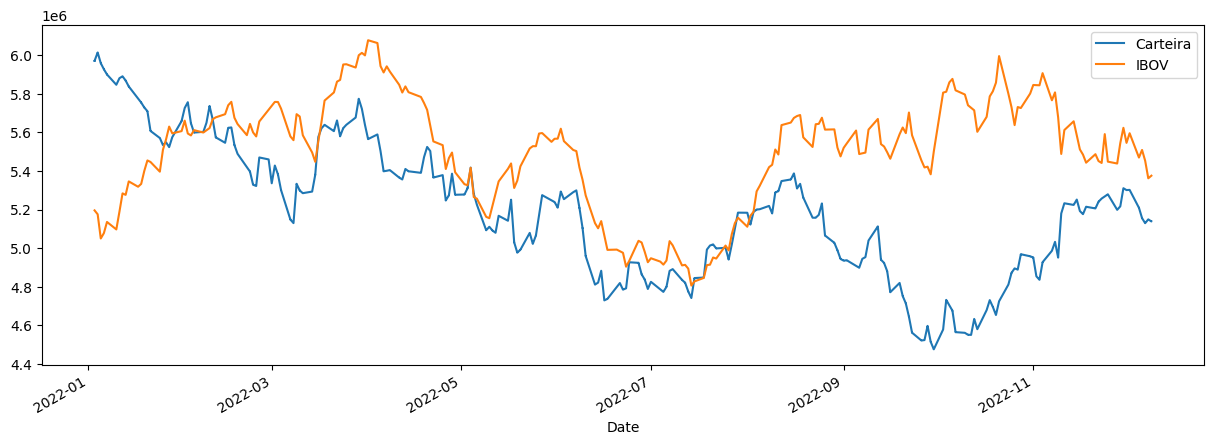

In [69]:
# comparando a evolução da carteira com o IBOV
valor_investido['Total'].plot(figsize=(15,5), label='Carteira')
ibov_df['Close'].plot(label='IBOV')
plt.legend()